#Traffic Simulation
The following report simulates the predicted traffic patterns for two stretches of road under two differing sets of assumptions.  The first set assumes that all drivers adhere to a uniform moderate driving style, while the second set adds a 10% chance for a driver to have a more aggressive driving style (higher top speed & acceleration, lower chance to slow) and a 15% chance for a driver to be a commercial vehicle (lower top speed & acceleration, larger required distance to next car, and longer vehicle size).  The road segments these drivers are simulated on are a 1km, straight segment of road and a 7km, varied stretch of road (see figure below).  The ultimate goal of these simulations is to provide a suggested optimal speed limit for each scenario.  The optimal speed limit shall be one standard deviation above the mean speed for the simulated drivers on a given road.

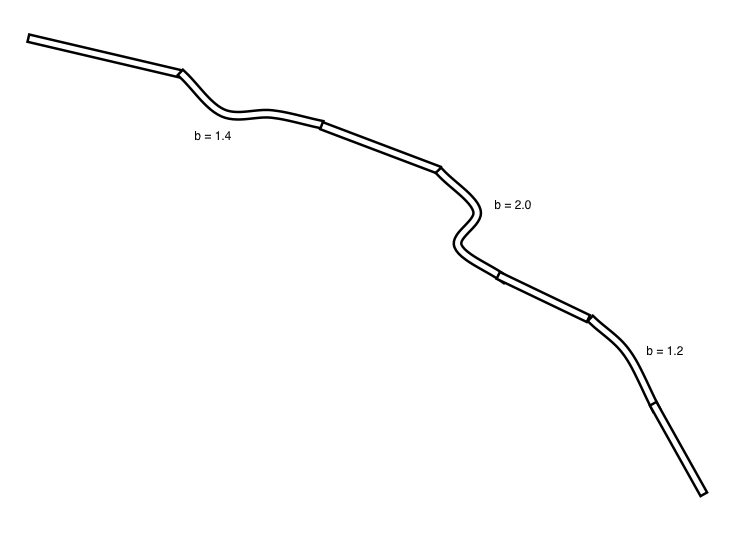

In [55]:
from IPython.display import Image
Image(filename='road.png')

####7km segment of road
(The numbers indicate a higher chance of cars slowing down.  For example, if b=2.0 cars are twice as likely to slow down on that stretch of road) 

In [1]:
import traffic_sim as traf
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn

In [2]:
%matplotlib inline

#1km Road, Single Driving Style

In [3]:
car_list = traf.create_cars(30)
sim = traf.Simulation(car_list, 1000, n=183)

In [4]:
def n_trials(simulation, n):
    trials = []
    for _ in range(n):
        trials.append(simulation.run_simulation())
    return np.array(trials)

In [5]:
trials = n_trials(sim, 10000)

In [6]:
traffic = trials.mean(axis=0)

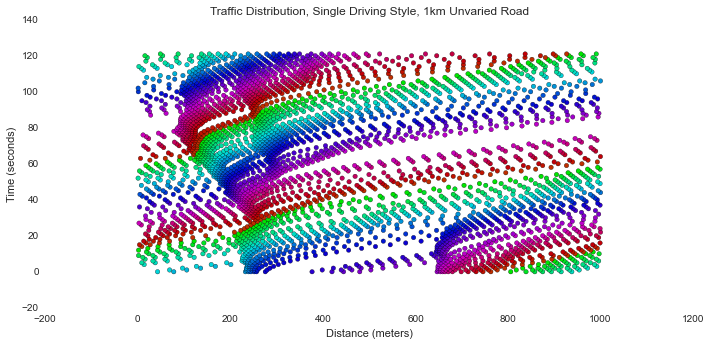

In [7]:
positions = traffic[0]
x = [positions[n, :] for n in range(len(positions))]
y = [[n for _ in range(len(positions[n]))] for n in range(len(positions))]

plt.scatter(x, y, c=["#00e500", "#00e322", "#00e243", "#00e163", "#00df84", 
                     "#00dea3", "#00ddc3", "#00d5db", "#00b4da", "#0093d9", 
                     "#0072d7","#0052d6","#0032d5","#0013d3","#0b00d2","#2a00d1",
                     "#4800d0","#6600ce","#8300cd","#a000cc","#bd00ca","#c900b9",
                     "#c8009a","#c6007c","#c5005f","#c40041","#c20024","#c10008",
                     "#c01400","#bf2f00"])
plt.ylabel("Time (seconds)")
plt.xlabel("Distance (meters)")
plt.title("Traffic Distribution, Single Driving Style, 1km Unvaried Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

Each point represents a unique car's position along the road for a given time.  We can see that there is a "shockwave" slow-down effect that develops and propogates back along the flow of traffic.  The position and severity of this slowdown should be random in this example (and there is nothing to indicate that it is not).

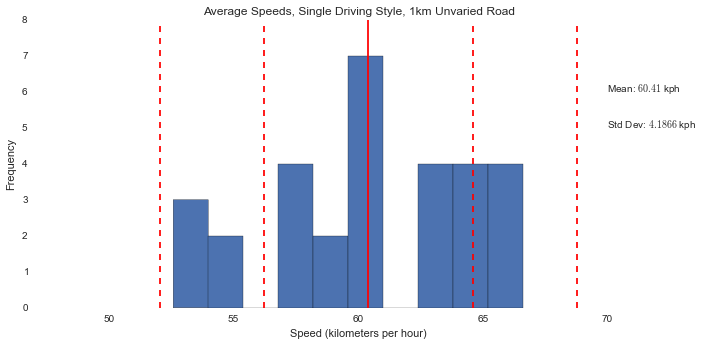

In [46]:
speeds = traffic[1] * 3.6
mean = np.mean(speeds.mean(axis=0))
stdev = np.std(speeds.mean(axis=0))
plt.hist(speeds.mean(axis=0), bins=10)
xmin, xmax = plt.xlim()
plt.xlim(xmin-5, xmax+5)
ymin, ymax = plt.ylim()
ymax = ymax + 1
plt.ylim(ymin, ymax)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev],
           ymin, ymax, linestyles="dashed", color="red")
plt.text(70, 6, r'Mean: ${}$ kph'.format(str(round(mean, 2))), fontsize=10)
plt.text(70, 5, r'Std Dev: ${}$ kph'.format(str(round(stdev, 4))), fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Speed (kilometers per hour)")
plt.title("Average Speeds, Single Driving Style, 1km Unvaried Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

Suggested optimal speed limit for our simulation in this scenario is:
      
 ```
mean:   60.41
stdev: + 4.1866
Speed:  64.5966 --rounds to--> ``` ***65kph*** speed limit


#7km Road, Single Driving Style

In [9]:
car_list2 = traf.create_cars((30*7))
sim_seven_km = traf.Simulation(car_list2, 7000, n=305)

In [10]:
trials_seven_km = n_trials(sim_seven_km, 5000)

In [11]:
traffic_seven_km = trials_seven_km.mean(axis=0)

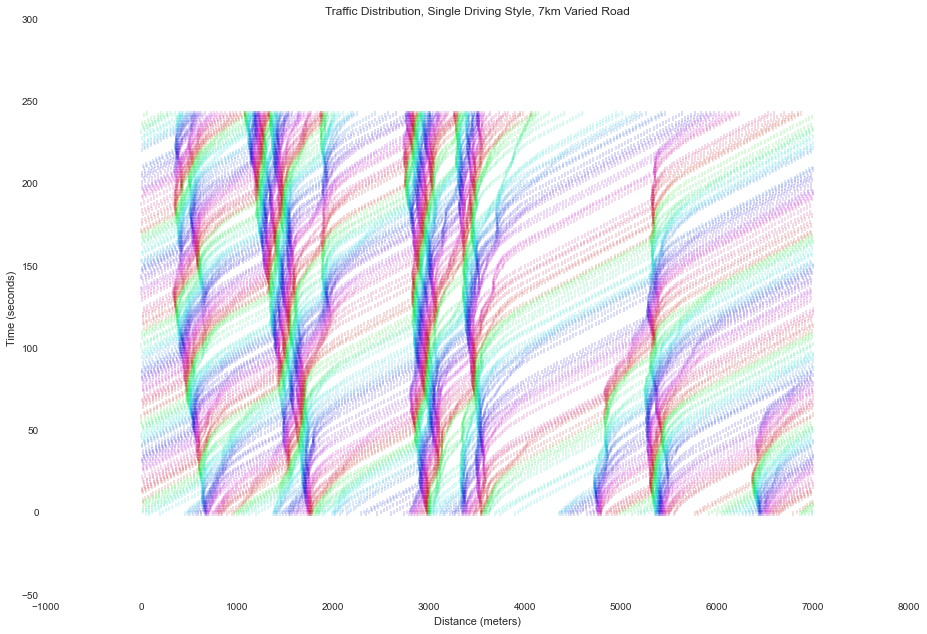

In [12]:
positions2 = traffic_seven_km[0]
x = [positions2[n, :] for n in range(len(positions2))]
y = [[n for _ in range(len(positions2[n]))] for n in range(len(positions2))]

plt.scatter(x, y, c=["#00e500", "#00e322", "#00e243", "#00e163", "#00df84",
                     "#00dea3", "#00ddc3", "#00d5db", "#00b4da", "#0093d9", 
                     "#0072d7","#0052d6","#0032d5","#0013d3","#0b00d2","#2a00d1",
                     "#4800d0","#6600ce","#8300cd","#a000cc","#bd00ca","#c900b9",
                     "#c8009a","#c6007c","#c5005f","#c40041","#c20024","#c10008",
                     "#c01400","#bf2f00"], marker="|")
plt.ylabel("Time (seconds)")
plt.xlabel("Distance (meters)")
plt.title("Traffic Distribution, Single Driving Style, 7km Varied Road")
plt.subplots_adjust(left=2, right=4, top=4, bottom=2)
plt.show()

Similar to the 1km scenario, we see a series of slowdown waves propogating back along the flow of traffic.  We also see stronger slowdowns in 2nd, 4th, and 6th kilometers. This is expected since those stretches of the 7km road have higher chances for cars to slow down (which should be what produces slowdown waves).

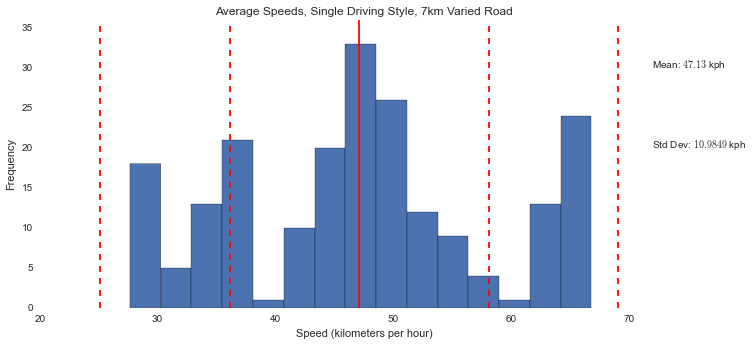

In [47]:
speeds2 = traffic_seven_km[1] * 3.6
mean2 = np.mean(speeds2.mean(axis=0))
stdev2 = np.std(speeds2.mean(axis=0))
plt.hist(speeds2.mean(axis=0), bins=15)
xmin, xmax = plt.xlim()
plt.xlim(xmin-5, xmax+5)
ymin, ymax = plt.ylim()
ymax = ymax + 1
plt.ylim(ymin, ymax)
plt.vlines(mean2, ymin, ymax, color="red")
plt.vlines([mean2 - 2 * stdev2, mean2 - stdev2, mean2 + stdev2, mean2 + 2 * stdev2], 
           ymin, ymax, linestyles="dashed", color="red")
plt.text(72, 30, r'Mean: ${}$ kph'.format(str(round(mean2, 2))), fontsize=10)
plt.text(72, 20, r'Std Dev: ${}$ kph'.format(str(round(stdev2, 4))), fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Speed (kilometers per hour)")
plt.title("Average Speeds, Single Driving Style, 7km Varied Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

Suggested optimal speed limit for our simulation in this scenario is:

```
mean:   47.13
stdev: +10.9849
Speed:  58.1199 --rounds to--> ``` ***58kph*** speed limit

#1km Road, Varied Driving Styles

In [20]:
car_list_varied = traf.create_cars((30), one_type=False)
sim_nightmare = traf.Simulation(car_list_varied, 1000, n=183)

In [21]:
trials_nightmare = n_trials(sim_nightmare, 10000)

In [22]:
traffic_nightmare = trials_nightmare.mean(axis=0)

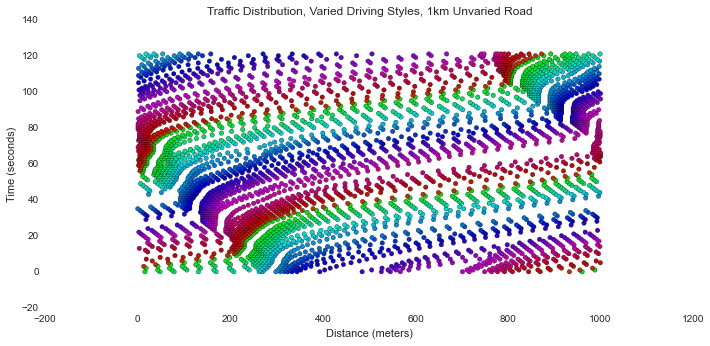

In [52]:
positions3 = traffic_nightmare[0]
x = [positions3[n, :] for n in range(len(positions3))]
y = [[n for _ in range(len(positions3[n]))] for n in range(len(positions3))]

plt.scatter(x, y, c=["#00e500", "#00e322", "#00e243", "#00e163", "#00df84", 
                     "#00dea3", "#00ddc3", "#00d5db", "#00b4da", "#0093d9", 
                     "#0072d7","#0052d6","#0032d5","#0013d3","#0b00d2","#2a00d1",
                     "#4800d0","#6600ce","#8300cd","#a000cc","#bd00ca","#c900b9",
                     "#c8009a","#c6007c","#c5005f","#c40041","#c20024","#c10008",
                     "#c01400","#bf2f00"])
plt.ylabel("Time (seconds)")
plt.xlabel("Distance (meters)")
plt.title("Traffic Distribution, Varied Driving Styles, 1km Unvaried Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

This scenario produces a similar result to the 1km single-style simulation, although we can see some larger gaps between certain cars which should be indicative of commercial drivers who are longer and require a larger distance from the car in front of them.

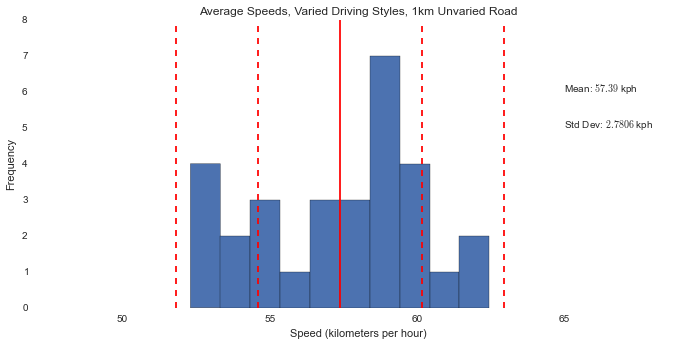

In [48]:
speeds3 = traffic_nightmare[1] * 3.6
mean3 = np.mean(speeds3.mean(axis=0))
stdev3 = np.std(speeds3.mean(axis=0))
plt.hist(speeds3.mean(axis=0), bins=10)
xmin, xmax = plt.xlim()
plt.xlim(xmin-5, xmax+5)
ymin, ymax = plt.ylim()
ymax = ymax + 1
plt.ylim(ymin, ymax)
plt.vlines(mean3, ymin, ymax, color="red")
plt.vlines([mean3 - 2 * stdev3, mean3 - stdev3, mean3 + stdev3, mean3 + 2 * stdev3],
           ymin, ymax, linestyles="dashed", color="red")
plt.text(65, 6, r'Mean: ${}$ kph'.format(str(round(mean3, 2))), fontsize=10)
plt.text(65, 5, r'Std Dev: ${}$ kph'.format(str(round(stdev3, 4))), fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Speed (kilometers per hour)")
plt.title("Average Speeds, Varied Driving Styles, 1km Unvaried Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

Suggested optimal speed limit for our simulation in this scenario is:

```
mean:   57.39
stdev: + 2.7806
Speed:  60.1706 --rounds to--> ``` ***60kph*** speed limit

#7km Road, Varied Driving Styles

In [25]:
car_list_varied2 = traf.create_cars((30*7), one_type=False)
sim_seven_km_nightmare = traf.Simulation(car_list_varied2, 7000, n=305)

In [26]:
trials_seven_km_nightmare = n_trials(sim_seven_km_nightmare, 5000)

In [27]:
traffic_seven_km_nightmare = trials_seven_km_nightmare.mean(axis=0)

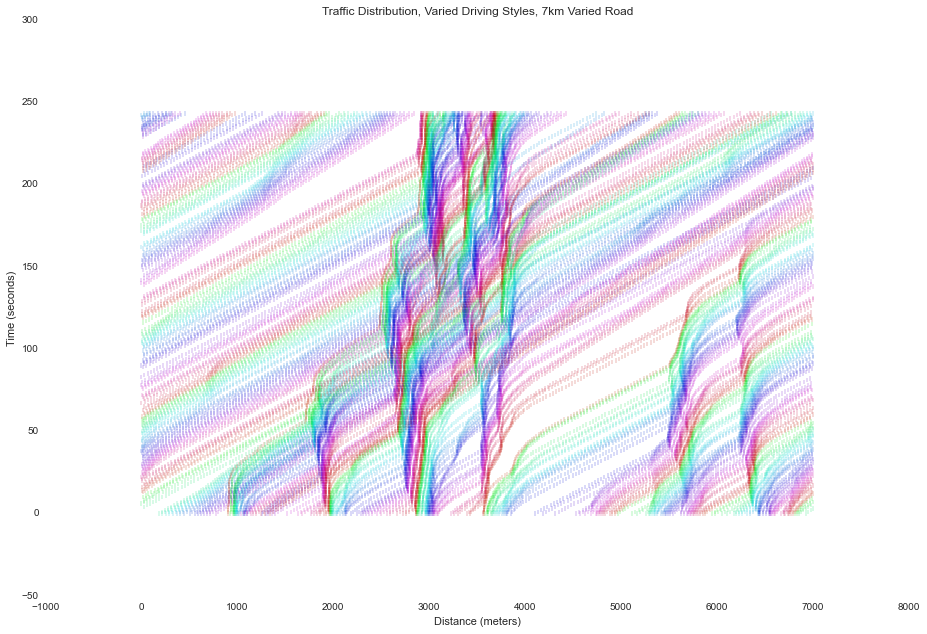

In [54]:
positions4 = traffic_seven_km_nightmare[0]
x = [positions4[n, :] for n in range(len(positions4))]
y = [[n for _ in range(len(positions4[n]))] for n in range(len(positions4))]

plt.scatter(x, y, c=["#00e500", "#00e322", "#00e243", "#00e163", "#00df84", 
                     "#00dea3", "#00ddc3", "#00d5db", "#00b4da", "#0093d9", 
                     "#0072d7","#0052d6","#0032d5","#0013d3","#0b00d2","#2a00d1",
                     "#4800d0","#6600ce","#8300cd","#a000cc","#bd00ca","#c900b9",
                     "#c8009a","#c6007c","#c5005f","#c40041","#c20024","#c10008",
                     "#c01400","#bf2f00"], marker="|")
plt.ylabel("Time (seconds)")
plt.xlabel("Distance (meters)")
plt.title("Traffic Distribution, Varied Driving Styles, 7km Varied Road")
plt.subplots_adjust(left=2, right=4, top=4, bottom=2)
plt.show()

While we still see slowdowns in the 2nd and 6th kilometers with The varied driving styles on the 7km road, there is a much more marked slowdown wave in the 4th kilometer.  Since the driving styles are varied and this graph is the result of the average of 5000 simulations, the slowdown from the 4th kilometer should be the most prominent slowdown since it has the largest chance (twice normal) for cars to slow.  We also see much larger variations in car distances from each other than with the single driving style model, which we would also expect to see.

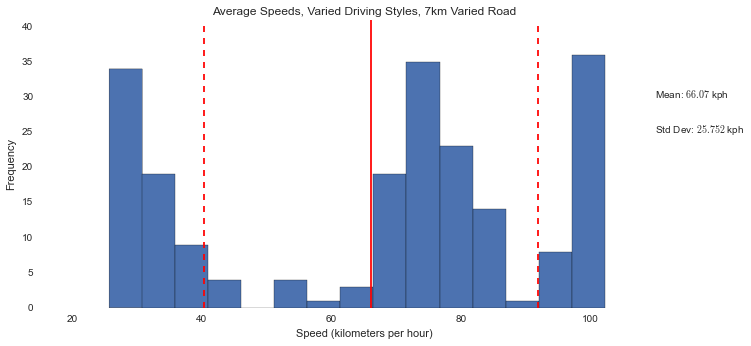

In [49]:
speeds4 = traffic_seven_km_nightmare[1] * 3.6
mean4 = np.mean(speeds4.mean(axis=0))
stdev4 = np.std(speeds4.mean(axis=0))
plt.hist(speeds4.mean(axis=0), bins=15)
xmin, xmax = plt.xlim()
plt.xlim(xmin-5, xmax+5)
ymin, ymax = plt.ylim()
ymax = ymax + 1
plt.ylim(ymin, ymax)
plt.vlines(mean4, ymin, ymax, color="red")
plt.vlines([mean4 - 2 * stdev4, mean4 - stdev4, mean4 + stdev4, mean4 + 2 * stdev4], 
           ymin, ymax, linestyles="dashed", color="red")
plt.text(110, 30, r'Mean: ${}$ kph'.format(str(round(mean4, 2))), fontsize=10)
plt.text(110, 25, r'Std Dev: ${}$ kph'.format(str(round(stdev4, 4))), fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Speed (kilometers per hour)")
plt.title("Average Speeds, Varied Driving Styles, 7km Varied Road")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.show()

Suggested optimal speed limit for our simulation in this scenario is:

```
mean:   66.07
stdev: +25.752
Speed:  91.822 --rounds to--> ```  ***92kph*** speed limit


It would also be recommended in this scenario that a Strong Curve Ahead warning sign be placed going into kilometer 3, with a suggested speed limit of 1/2 to 2/3 of the 92kph limit until the beginning of kilometer 4, in order to potentially mitigate the large slowdowns seen in our simulation of that stretch of road.